In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [86]:
df = pd.read_csv('tumor.csv')
df.shape

(569, 33)

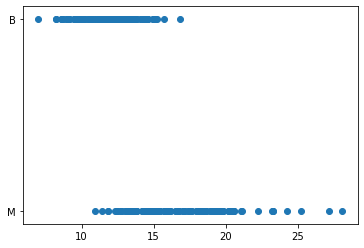

In [87]:
plt.scatter(df.radius_mean[:250], df.diagnosis[:250])

In [88]:
x = np.array(df.radius_mean)

In [89]:
y = np.array([0 if el == 'B' else 1 for el in df.diagnosis])

In [90]:
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [91]:
train_slice = int(np.round(df.shape[0]*.7))
train_set_y = y[:train_slice]
test_set_y = y[train_slice: ]
train_set_x = x[:train_slice]
test_set_x = x[train_slice: ]
print(len(test_set_y), len(test_set_x))

171 171


In [99]:

iteration = 10000
learning_rate = 0.0001  
yPredict = []
cost = []
def gredient_descent(x,y,iteration,learning_rate):
    m0 = 0
    m1 = 0
    for _ in range(iteration):
        lin_model = m0 + m1*x
        ySigmoid = 1 / (1 + np.exp(-lin_model))
        yPredict = [0 if el<0.5 else 1 for el in ySigmoid]
        cost.append( (1/len(x))*np.sum(y*np.log(ySigmoid) - (1-y)*np.log(1-ySigmoid)) )
        temp0 = m0 - (1/len(x))*learning_rate*np.sum((yPredict - y)*x)
        temp1 = m1 - (1/len(x))*learning_rate*np.sum(yPredict - y)
        m0 = temp0
        m1 = temp1
        #print(ySigmoid)    
    return yPredict, m0, m1, cost, ySigmoid
yPredict, m0, m1, cost, ySigmoid = gredient_descent(train_set_x,train_set_y, iteration, learning_rate)



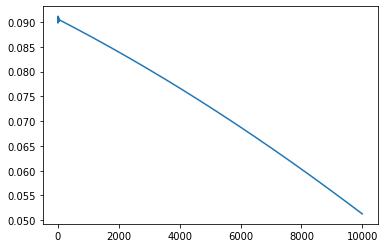

In [100]:
plt.plot(range(iteration), cost)
plt.show()

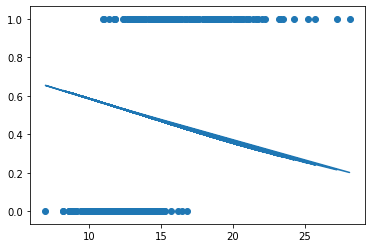

In [111]:
plt.scatter(train_set_x, train_set_y)
plt.plot(train_set_x, ySigmoid)
plt.show()


In [106]:
def accuracy(x, y, m0, m1):
    true_positive = 0
    lin_model = m0 + m1*x
    ySigmoid = 1 / (1 + np.exp(-lin_model))
    yPredict = [0 if el<0.5 else 1 for el in ySigmoid]
    for i in range(len(x)):
        if yPredict[i] == y[i]:
            true_positive += 1
    accuracy = true_positive / len(x)        
    return true_positive, accuracy, yPredict    
              


In [107]:
true, acc, yPredict= accuracy(test_set_x, test_set_y, m0, m1)

In [108]:
true

34

In [109]:
acc

0.19883040935672514

In [110]:
print(test_set_y, yPredict)

[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0] [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
